In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("blogs.csv")

In [3]:
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [4]:
print ("head")

head


In [5]:
print(df.isnull().sum())
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)


Data      0
Labels    0
dtype: int64


In [6]:
print(df['Labels'].value_counts())


Labels
alt.atheism                 100
comp.graphics               100
comp.os.ms-windows.misc     100
comp.sys.ibm.pc.hardware    100
comp.sys.mac.hardware       100
comp.windows.x              100
misc.forsale                100
rec.autos                   100
rec.motorcycles             100
rec.sport.baseball          100
rec.sport.hockey            100
sci.crypt                   100
sci.electronics             100
sci.med                     100
sci.space                   100
soc.religion.christian      100
talk.politics.guns          100
talk.politics.mideast       100
talk.politics.misc          100
talk.religion.misc          100
Name: count, dtype: int64


In [9]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # keep only letters and spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['Cleaned_Data'] = df['Data'].apply(clean_text)


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = tfidf.fit_transform(df)
y = df['Labels']


In [13]:
print(X.shape)


(3, 3)


In [15]:
print("Shape of X:", X.shape)
print("Length of y:", len(y))


Shape of X: (3, 3)
Length of y: 2000


In [17]:
print(df.shape)
print(df.notna().sum())


(2000, 3)
Data            2000
Labels          2000
Cleaned_Data    2000
dtype: int64


In [20]:
df = df.dropna(subset=['Labels'])


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

X = tfidf.fit_transform(df)
y = df['Labels']

print(X.shape, len(y))


(3, 3) 2000


In [26]:
print(df.shape)
print(df.columns)
print(df.head(5))
print(df.isna().sum())


(2000, 3)
Index(['Data', 'Labels', 'Cleaned_Data'], dtype='object')
                                                Data       Labels  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism   

                                        Cleaned_Data  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
1  newsgroups altatheism path cantaloupesrvcscmue...  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
4  xref cantaloupesrvcscmuedu altatheism talkreli...  
Data            0
Labels          0
Cleaned_Data    0
dtype: int64


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

# Use the full Cleaned_Data column (all 2000 rows)
X = tfidf.fit_transform(df['Cleaned_Data'])
y = df['Labels']

print("Shape of X:", X.shape)
print("Length of y:", len(y))


Shape of X: (2000, 5000)
Length of y: 2000


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [31]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


MultinomialNB()

In [32]:
y_pred = nb_model.predict(X_test)


In [33]:
print("🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))


🔹 Accuracy: 0.8575

🔹 Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.88      0.70      0.78        20
           comp.graphics       0.94      0.80      0.86        20
 comp.os.ms-windows.misc       0.90      0.95      0.93        20
comp.sys.ibm.pc.hardware       0.64      0.80      0.71        20
   comp.sys.mac.hardware       1.00      0.80      0.89        20
          comp.windows.x       0.86      0.90      0.88        20
            misc.forsale       0.95      0.95      0.95        20
               rec.autos       0.94      0.85      0.89        20
         rec.motorcycles       0.86      0.90      0.88        20
      rec.sport.baseball       1.00      1.00      1.00        20
        rec.sport.hockey       1.00      0.95      0.97        20
               sci.crypt       0.95      1.00      0.98        20
         sci.electronics       0.84      0.80      0.82        20
                 sci.med     

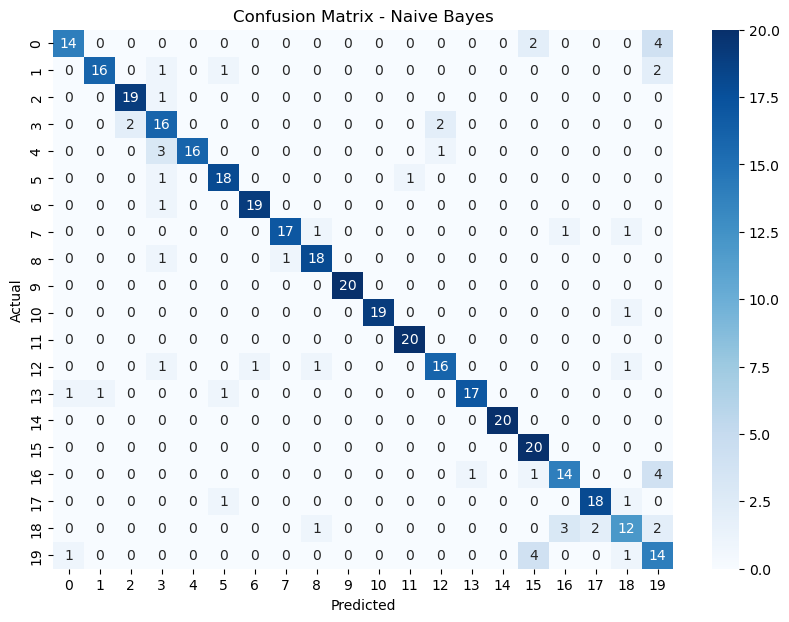

In [35]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [36]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [37]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\adnan\AppData\Roaming\nltk_data...


True

In [38]:
sia = SentimentIntensityAnalyzer()

In [39]:
def get_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'


In [40]:
df['Sentiment'] = df['Data'].apply(get_sentiment)


In [41]:
print(df['Sentiment'].value_counts())


Sentiment
Positive    1334
Negative     631
Neutral       35
Name: count, dtype: int64


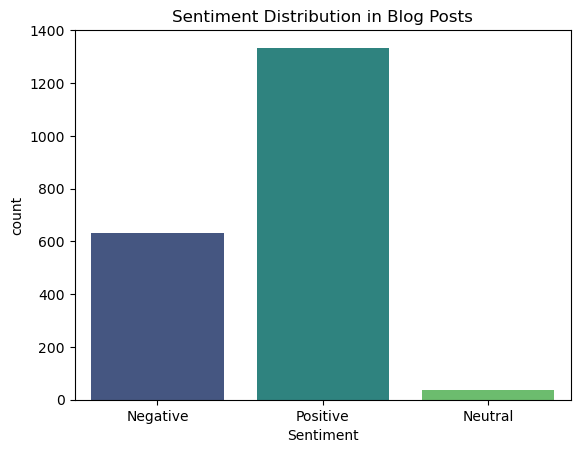

In [44]:
sns.countplot(data=df, x='Sentiment', hue='Sentiment', palette='viridis', legend=False)
plt.title("Sentiment Distribution in Blog Posts")
plt.show()


Sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                   0.42     0.01      0.57
comp.graphics                 0.13     0.04      0.83
comp.os.ms-windows.misc       0.24     0.02      0.74
comp.sys.ibm.pc.hardware      0.21     0.00      0.79
comp.sys.mac.hardware         0.24     0.03      0.73
comp.windows.x                0.20     0.02      0.78
misc.forsale                  0.07     0.08      0.85
rec.autos                     0.27     0.01      0.72
rec.motorcycles               0.30     0.02      0.68
rec.sport.baseball            0.27     0.01      0.72
rec.sport.hockey              0.28     0.01      0.71
sci.crypt                     0.29     0.00      0.71
sci.electronics               0.18     0.04      0.78
sci.med                       0.38     0.01      0.61
sci.space                     0.32     0.03      0.65
soc.religion.christian        0.29     0.00      0.71
talk.politics.guns          

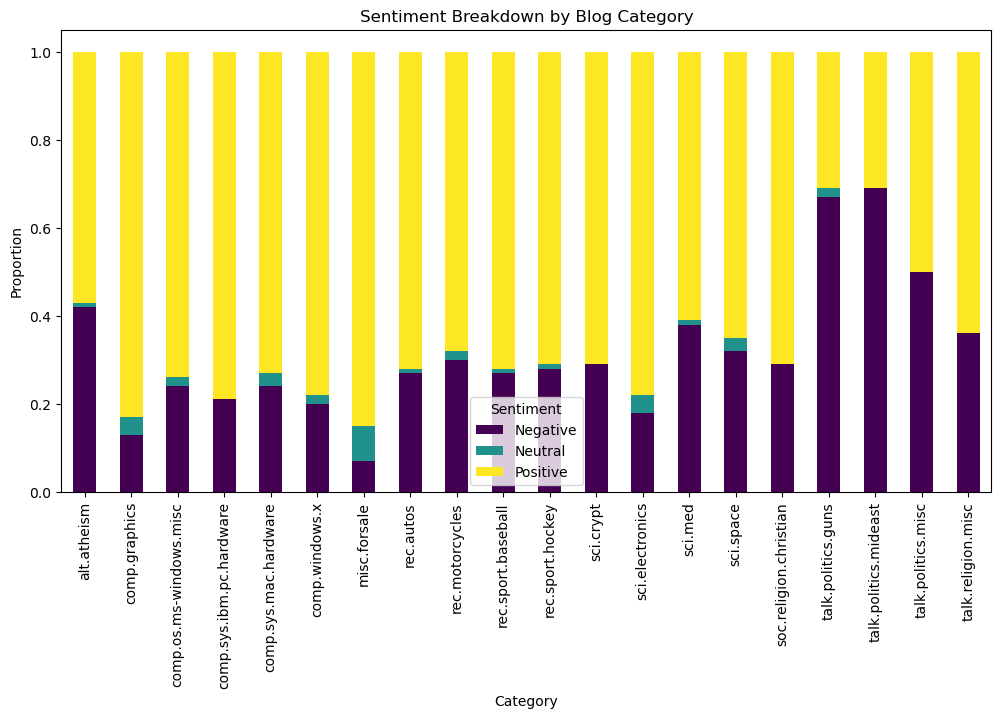

In [45]:
sentiment_summary = (
    df.groupby('Labels')['Sentiment']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
    .sort_index()
)

print(sentiment_summary)

# Plot sentiment distribution per category
sentiment_summary.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')
plt.title("Sentiment Breakdown by Blog Category")
plt.xlabel("Category")
plt.ylabel("Proportion")
plt.show()


In [46]:
# Add model predictions for all posts
df['Predicted_Category'] = nb_model.predict(X)

# Show a few rows to verify
df[['Data', 'Labels', 'Predicted_Category', 'Sentiment']].head()


,Data,Labels,Predicted_Category,Sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,alt.atheism,Negative
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,alt.atheism,Positive
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,alt.atheism,Negative
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,talk.politics.mideast,Negative
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,alt.atheism,Positive


Sentiment                 Negative   Neutral  Positive
Predicted_Category                                    
alt.atheism               0.426966  0.011236  0.561798
comp.graphics             0.103093  0.041237  0.855670
comp.os.ms-windows.misc   0.247525  0.019802  0.732673
comp.sys.ibm.pc.hardware  0.194444  0.000000  0.805556
comp.sys.mac.hardware     0.242105  0.031579  0.726316


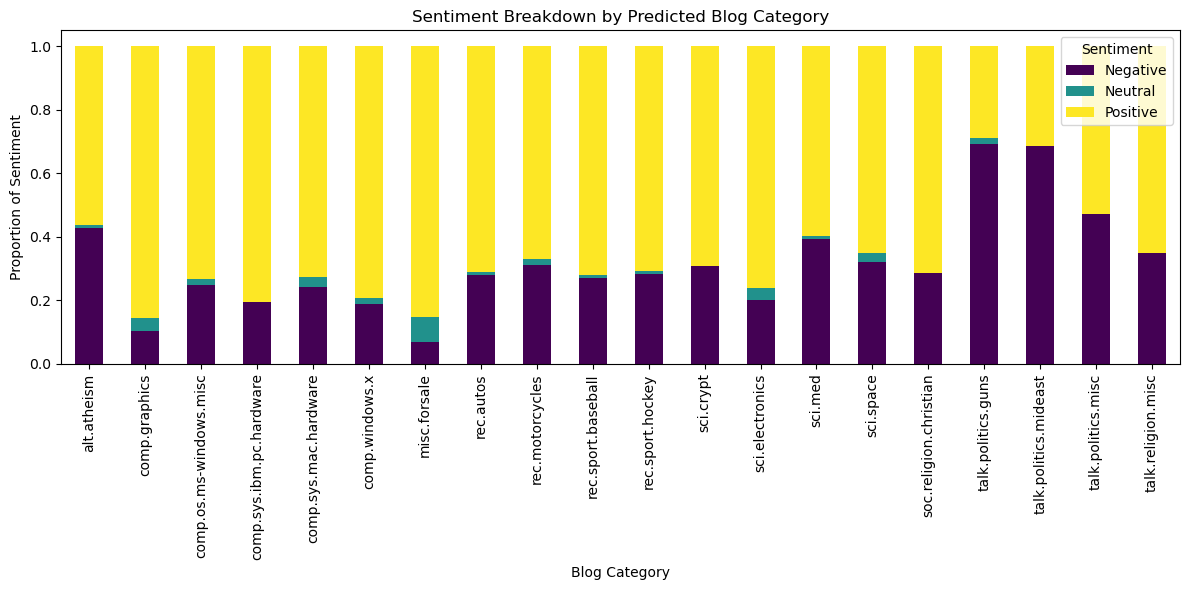

In [47]:
sentiment_summary = (
    df.groupby('Predicted_Category')['Sentiment']
      .value_counts(normalize=True)
      .unstack()
      .fillna(0)
      .sort_index()
)

print(sentiment_summary.head())

# Visualization (Seaborn ≥ 0.14 safe syntax)
import seaborn as sns
import matplotlib.pyplot as plt

sentiment_summary.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')
plt.title("Sentiment Breakdown by Predicted Blog Category")
plt.xlabel("Blog Category")
plt.ylabel("Proportion of Sentiment")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


In [48]:
misclassified = df[df['Labels'] != df['Predicted_Category']]
print("Number of misclassified posts:", len(misclassified))
misclassified[['Data', 'Labels', 'Predicted_Category']].head()


Number of misclassified posts: 83


,Data,Labels,Predicted_Category
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,talk.politics.mideast
5,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,alt.atheism,talk.religion.misc
20,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,alt.atheism,talk.religion.misc
31,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,talk.religion.misc
41,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,talk.religion.misc


In [49]:
df.to_csv("blogs_with_predictions_and_sentiment.csv", index=False)
print("✅ File saved: blogs_with_predictions_and_sentiment.csv")


✅ File saved: blogs_with_predictions_and_sentiment.csv


In [50]:
print("===== FINAL SUMMARY =====")
print(f"Total blog posts: {len(df)}")
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nSentiment distribution:")
print(df['Sentiment'].value_counts(normalize=True).round(2))


===== FINAL SUMMARY =====
Total blog posts: 2000
Model Accuracy: 0.86

Sentiment distribution:
Sentiment
Positive    0.67
Negative    0.32
Neutral     0.02
Name: proportion, dtype: float64


In [51]:
from sklearn.model_selection import train_test_split

# X is the TF-IDF feature matrix, y is the category labels
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                 # X = TF-IDF features, y = Labels
    test_size=0.2,        # 20% of data for testing
    random_state=42,      # for reproducibility
    stratify=y            # maintain label distribution
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (1600, 5000)
Test set size: (400, 5000)


In [52]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the model
nb_model = MultinomialNB()

# Train the model on training data
nb_model.fit(X_train, y_train)


MultinomialNB()

In [53]:
# Predict categories for the test set
y_pred = nb_model.predict(X_test)

# Preview the first 10 predictions
print("Predictions:", y_pred[:10])
print("Actual labels:", y_test[:10].values)


Predictions: ['sci.crypt' 'sci.med' 'talk.politics.mideast' 'soc.religion.christian'
 'talk.politics.guns' 'sci.med' 'comp.windows.x' 'rec.motorcycles'
 'talk.politics.mideast' 'comp.graphics']
Actual labels: ['sci.crypt' 'sci.med' 'talk.politics.mideast' 'soc.religion.christian'
 'talk.politics.guns' 'sci.med' 'comp.windows.x' 'rec.motorcycles'
 'talk.politics.mideast' 'comp.graphics']


🔹 Accuracy: 0.8575

🔹 Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.88      0.70      0.78        20
           comp.graphics       0.94      0.80      0.86        20
 comp.os.ms-windows.misc       0.90      0.95      0.93        20
comp.sys.ibm.pc.hardware       0.64      0.80      0.71        20
   comp.sys.mac.hardware       1.00      0.80      0.89        20
          comp.windows.x       0.86      0.90      0.88        20
            misc.forsale       0.95      0.95      0.95        20
               rec.autos       0.94      0.85      0.89        20
         rec.motorcycles       0.86      0.90      0.88        20
      rec.sport.baseball       1.00      1.00      1.00        20
        rec.sport.hockey       1.00      0.95      0.97        20
               sci.crypt       0.95      1.00      0.98        20
         sci.electronics       0.84      0.80      0.82        20
                 sci.med     

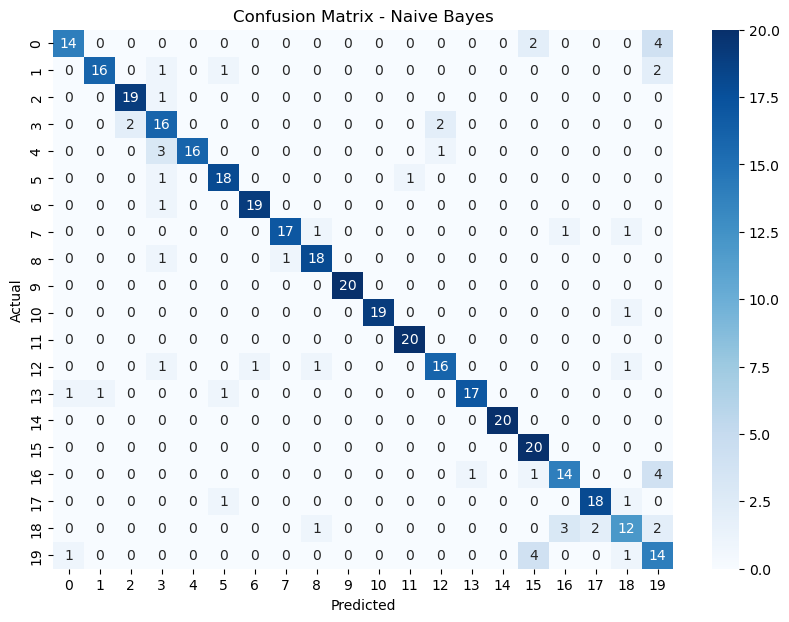

In [54]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("🔹 Accuracy:", accuracy)

# Detailed classification report
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [56]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()


In [57]:
def get_sentiment(text):
    score = sia.polarity_scores(text)['compound']  # compound score ranges -1 to 1
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'


In [58]:
df['Sentiment'] = df['Data'].apply(get_sentiment)


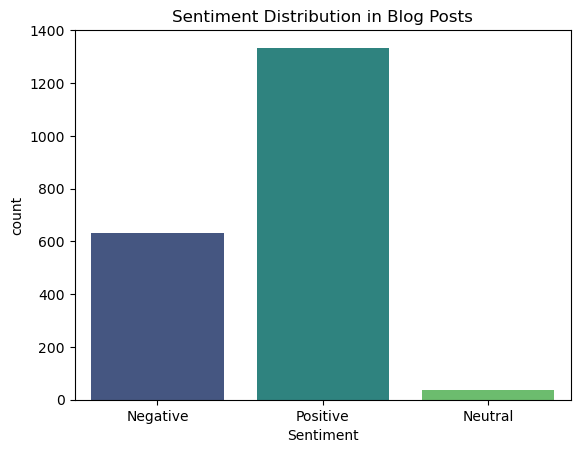

In [60]:
sns.countplot(data=df, x='Sentiment', hue='Sentiment', palette='viridis', legend=False)
plt.title("Sentiment Distribution in Blog Posts")
plt.show()


In [61]:
# Assuming nb_model is your trained Naive Bayes model
df['Predicted_Category'] = nb_model.predict(X)  # X = TF-IDF features for all posts


In [62]:
df[['Data', 'Labels', 'Predicted_Category', 'Sentiment']].head()


,Data,Labels,Predicted_Category,Sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,alt.atheism,Negative
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,alt.atheism,Positive
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,alt.atheism,Negative
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,talk.politics.mideast,Negative
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,alt.atheism,Positive


In [66]:
df.to_csv("blogs_with_predictions_and_sentiment.csv", index=False)
print("✅ File saved: blogs_with_predictions_and_sentiment.csv")


✅ File saved: blogs_with_predictions_and_sentiment.csv


In [67]:
from sklearn.metrics import accuracy_score, classification_report

# Overall accuracy
accuracy = accuracy_score(df['Labels'], df['Predicted_Category'])
print("🔹 Overall Naive Bayes Accuracy:", round(accuracy, 2))

# Detailed classification report
print("\n🔹 Classification Report:\n", classification_report(df['Labels'], df['Predicted_Category']))

# Sentiment distribution
print("\n🔹 Sentiment Distribution (%):")
print((df['Sentiment'].value_counts(normalize=True)*100).round(2))


🔹 Overall Naive Bayes Accuracy: 0.96

🔹 Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.98      0.87      0.92       100
           comp.graphics       0.98      0.95      0.96       100
 comp.os.ms-windows.misc       0.98      0.99      0.99       100
comp.sys.ibm.pc.hardware       0.88      0.95      0.91       100
   comp.sys.mac.hardware       1.00      0.95      0.97       100
          comp.windows.x       0.97      0.98      0.98       100
            misc.forsale       0.96      0.97      0.97       100
               rec.autos       0.99      0.96      0.97       100
         rec.motorcycles       0.97      0.97      0.97       100
      rec.sport.baseball       1.00      1.00      1.00       100
        rec.sport.hockey       1.00      0.99      0.99       100
               sci.crypt       0.98      0.99      0.99       100
         sci.electronics       0.96      0.96      0.96       100
           

In [69]:
df[['Data','Labels','Predicted_Category','Sentiment']].to_csv("final_report.csv", index=False)
print("✅ Final report saved as 'final_report.csv'")


✅ Final report saved as 'final_report.csv'


In [71]:
def get_sentiment(text):
    score = sia.polarity_scores(text)['compound']  # compound score
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'


In [72]:
# Apply sentiment analysis only on the 'Data' column
df['Sentiment'] = df['Data'].apply(get_sentiment)

# Preview results
df[['Data', 'Sentiment']].head()


,Data,Sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,Negative
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,Positive
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,Negative
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,Negative
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,Positive


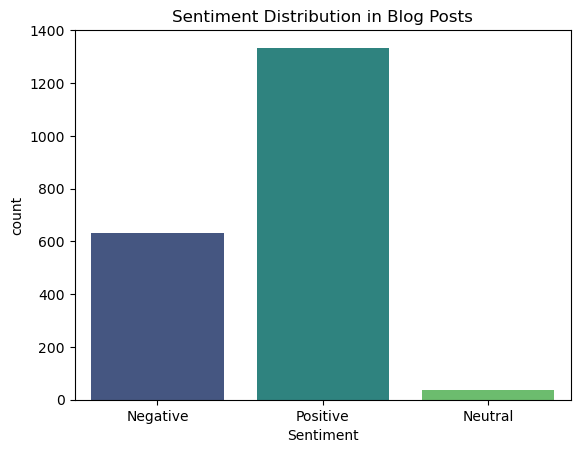

In [74]:
sns.countplot(data=df, x='Sentiment', hue='Sentiment', palette='viridis', legend=False)
plt.title("Sentiment Distribution in Blog Posts")
plt.show()


Sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                   0.42     0.01      0.57
comp.graphics                 0.13     0.04      0.83
comp.os.ms-windows.misc       0.24     0.02      0.74
comp.sys.ibm.pc.hardware      0.21     0.00      0.79
comp.sys.mac.hardware         0.24     0.03      0.73
comp.windows.x                0.20     0.02      0.78
misc.forsale                  0.07     0.08      0.85
rec.autos                     0.27     0.01      0.72
rec.motorcycles               0.30     0.02      0.68
rec.sport.baseball            0.27     0.01      0.72
rec.sport.hockey              0.28     0.01      0.71
sci.crypt                     0.29     0.00      0.71
sci.electronics               0.18     0.04      0.78
sci.med                       0.38     0.01      0.61
sci.space                     0.32     0.03      0.65
soc.religion.christian        0.29     0.00      0.71
talk.politics.guns          

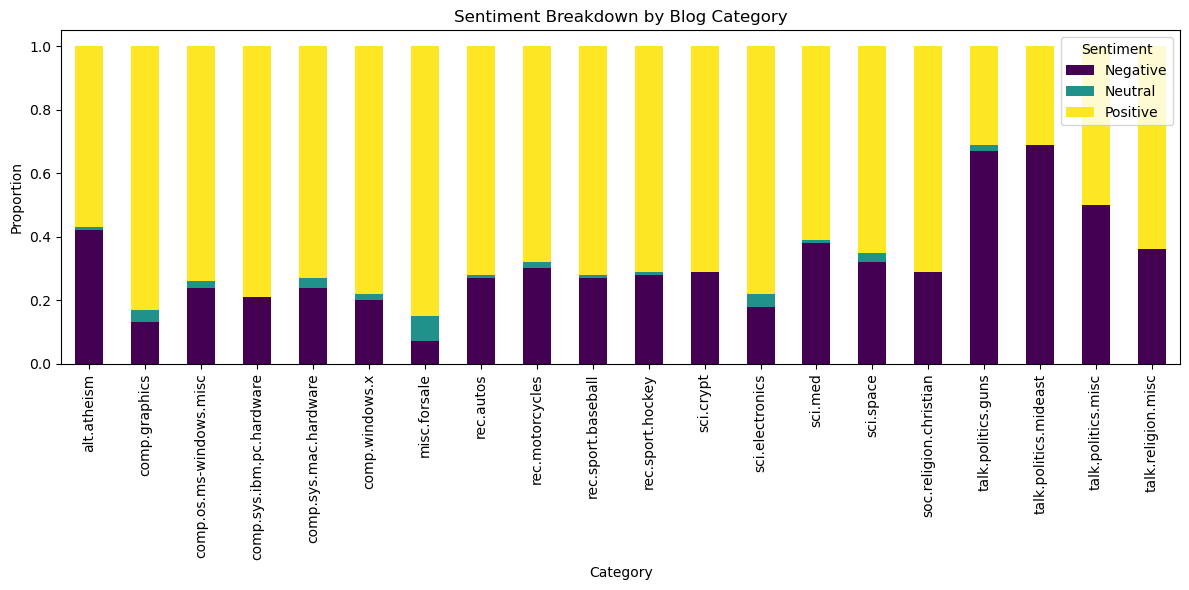

In [75]:
# Group by blog category
sentiment_summary = df.groupby('Labels')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)

print(sentiment_summary)

# Stacked bar chart for visualization
sentiment_summary.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')
plt.title("Sentiment Breakdown by Blog Category")
plt.xlabel("Category")
plt.ylabel("Proportion")
plt.tight_layout()
plt.show()


In [77]:
# Check sentiment distribution across actual categories
category_sentiment = df.groupby('Labels')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)
print(category_sentiment)


Sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                   0.42     0.01      0.57
comp.graphics                 0.13     0.04      0.83
comp.os.ms-windows.misc       0.24     0.02      0.74
comp.sys.ibm.pc.hardware      0.21     0.00      0.79
comp.sys.mac.hardware         0.24     0.03      0.73
comp.windows.x                0.20     0.02      0.78
misc.forsale                  0.07     0.08      0.85
rec.autos                     0.27     0.01      0.72
rec.motorcycles               0.30     0.02      0.68
rec.sport.baseball            0.27     0.01      0.72
rec.sport.hockey              0.28     0.01      0.71
sci.crypt                     0.29     0.00      0.71
sci.electronics               0.18     0.04      0.78
sci.med                       0.38     0.01      0.61
sci.space                     0.32     0.03      0.65
soc.religion.christian        0.29     0.00      0.71
talk.politics.guns          

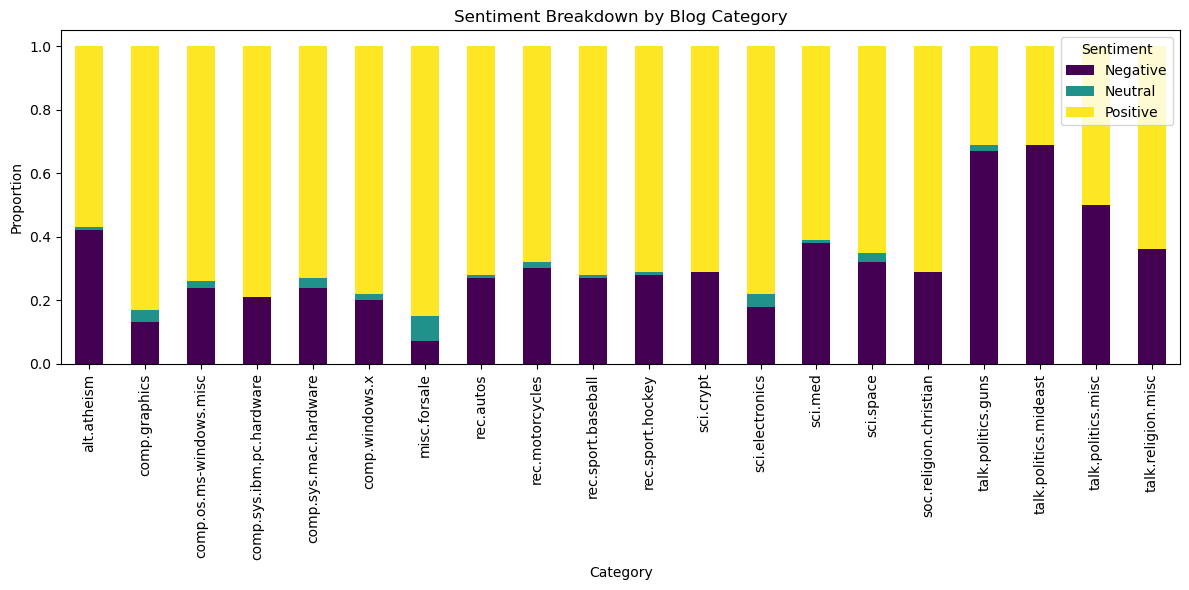

In [78]:
import matplotlib.pyplot as plt

# Stacked bar chart
category_sentiment.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')
plt.title("Sentiment Breakdown by Blog Category")
plt.xlabel("Category")
plt.ylabel("Proportion")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


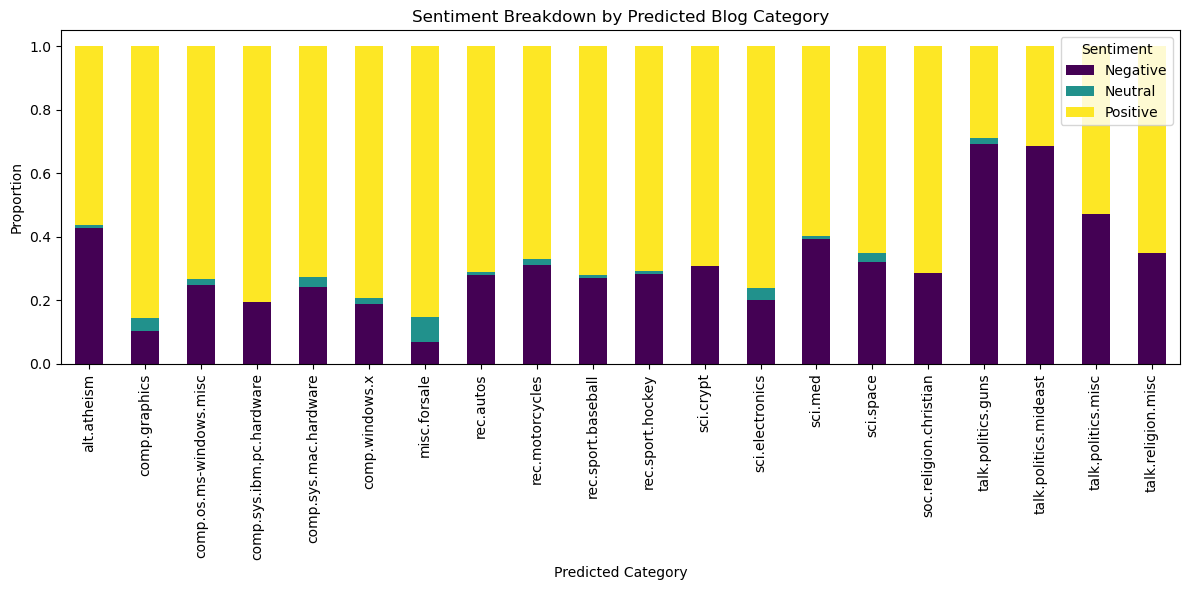

In [79]:
# If you have predicted categories from Naive Bayes:
predicted_sentiment_summary = df.groupby('Predicted_Category')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)
predicted_sentiment_summary.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')
plt.title("Sentiment Breakdown by Predicted Blog Category")
plt.xlabel("Predicted Category")
plt.ylabel("Proportion")
plt.tight_layout()
plt.show()


In [80]:
# Ensure you have Naive Bayes predictions
# df['Predicted_Category'] should contain the predicted labels
# df['Sentiment'] contains the sentiment analysis results

df[['Data', 'Labels', 'Predicted_Category', 'Sentiment']].head()


,Data,Labels,Predicted_Category,Sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,alt.atheism,Negative
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,alt.atheism,Positive
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,alt.atheism,Negative
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,talk.politics.mideast,Negative
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,alt.atheism,Positive


Sentiment                 Negative   Neutral  Positive
Predicted_Category                                    
alt.atheism               0.426966  0.011236  0.561798
comp.graphics             0.103093  0.041237  0.855670
comp.os.ms-windows.misc   0.247525  0.019802  0.732673
comp.sys.ibm.pc.hardware  0.194444  0.000000  0.805556
comp.sys.mac.hardware     0.242105  0.031579  0.726316
comp.windows.x            0.188119  0.019802  0.792079
misc.forsale              0.069307  0.079208  0.851485
rec.autos                 0.278351  0.010309  0.711340
rec.motorcycles           0.310000  0.020000  0.670000
rec.sport.baseball        0.270000  0.010000  0.720000
rec.sport.hockey          0.282828  0.010101  0.707071
sci.crypt                 0.306931  0.000000  0.693069
sci.electronics           0.200000  0.040000  0.760000
sci.med                   0.391753  0.010309  0.597938
sci.space                 0.320000  0.030000  0.650000
soc.religion.christian    0.287037  0.000000  0.712963
talk.polit

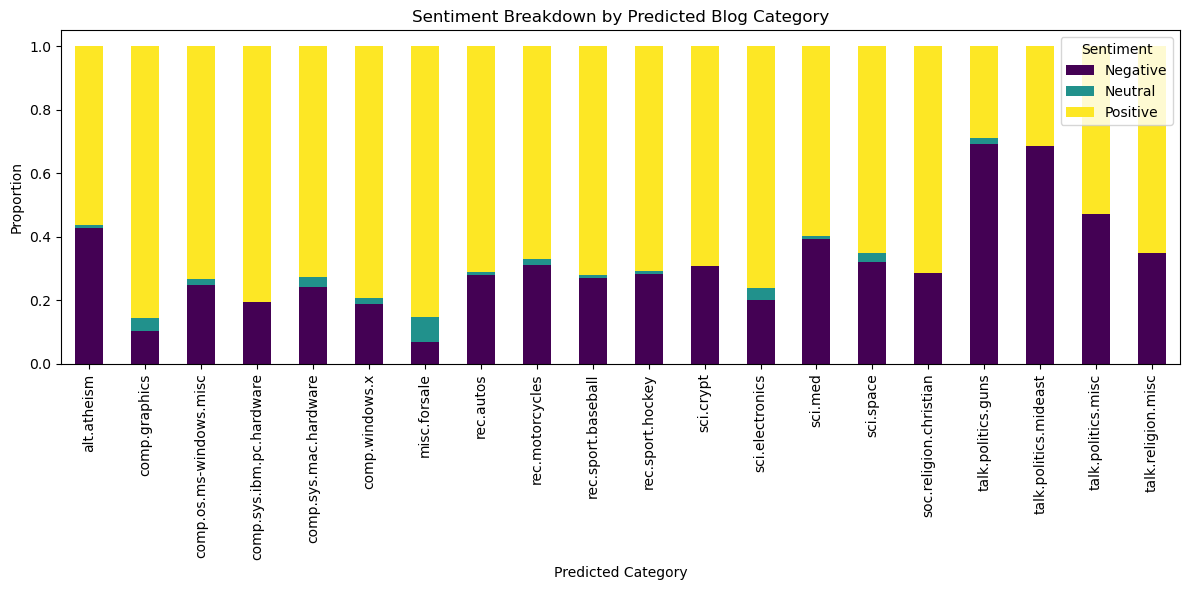

In [81]:
# Group by predicted category and count sentiment types
sentiment_summary = df.groupby('Predicted_Category')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)
print(sentiment_summary)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_summary.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')
plt.title("Sentiment Breakdown by Predicted Blog Category")
plt.xlabel("Predicted Category")
plt.ylabel("Proportion")
plt.tight_layout()
plt.show()


In [82]:
misclassified = df[df['Labels'] != df['Predicted_Category']]
print("Number of misclassified posts:", len(misclassified))
misclassified[['Data', 'Labels', 'Predicted_Category']].head()


Number of misclassified posts: 83


,Data,Labels,Predicted_Category
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,talk.politics.mideast
5,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,alt.atheism,talk.religion.misc
20,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,alt.atheism,talk.religion.misc
31,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,talk.religion.misc
41,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,talk.religion.misc


Overall Accuracy: 0.9585
                          precision    recall  f1-score   support

             alt.atheism       0.98      0.87      0.92       100
           comp.graphics       0.98      0.95      0.96       100
 comp.os.ms-windows.misc       0.98      0.99      0.99       100
comp.sys.ibm.pc.hardware       0.88      0.95      0.91       100
   comp.sys.mac.hardware       1.00      0.95      0.97       100
          comp.windows.x       0.97      0.98      0.98       100
            misc.forsale       0.96      0.97      0.97       100
               rec.autos       0.99      0.96      0.97       100
         rec.motorcycles       0.97      0.97      0.97       100
      rec.sport.baseball       1.00      1.00      1.00       100
        rec.sport.hockey       1.00      0.99      0.99       100
               sci.crypt       0.98      0.99      0.99       100
         sci.electronics       0.96      0.96      0.96       100
                 sci.med       0.99      0.96     

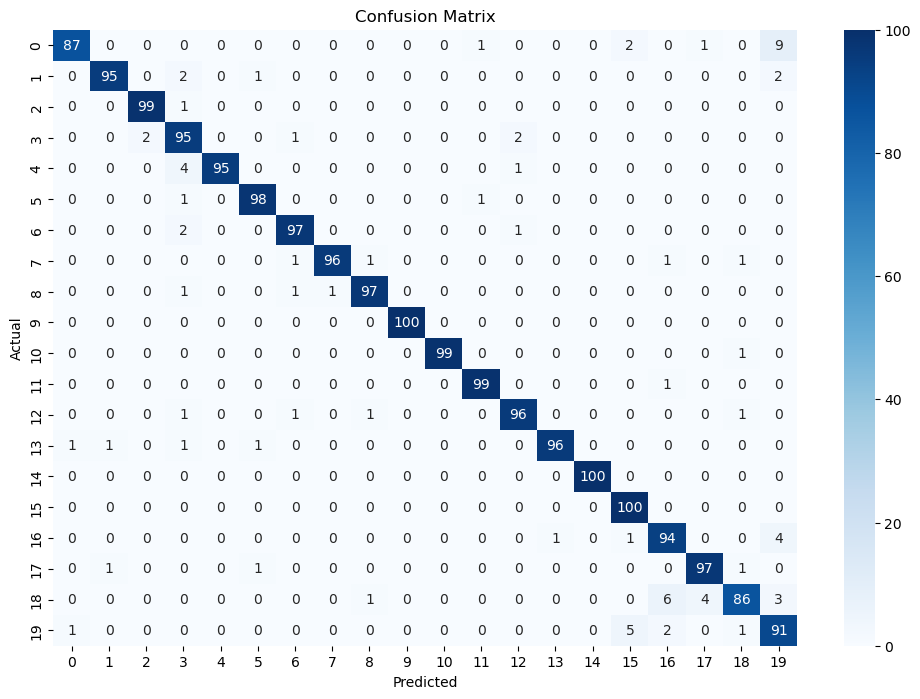

In [83]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Overall accuracy
accuracy = accuracy_score(df['Labels'], df['Predicted_Category'])
print("Overall Accuracy:", accuracy)

# Detailed classification report
print(classification_report(df['Labels'], df['Predicted_Category']))

# Confusion matrix visualization
cm = confusion_matrix(df['Labels'], df['Predicted_Category'])
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [84]:
df.to_csv("blogs_with_predictions_and_sentiment.csv", index=False)
print("✅ Final file saved as 'blogs_with_predictions_and_sentiment.csv'")


✅ Final file saved as 'blogs_with_predictions_and_sentiment.csv'


In [85]:
from sklearn.metrics import accuracy_score, classification_report

# Accuracy
accuracy = accuracy_score(df['Labels'], df['Predicted_Category'])
print("Overall Naive Bayes Accuracy:", round(accuracy, 2))

# Detailed classification report
print("\nClassification Report:\n", classification_report(df['Labels'], df['Predicted_Category']))

# Sentiment distribution
print("\nSentiment Distribution (%):")
print((df['Sentiment'].value_counts(normalize=True)*100).round(2))


Overall Naive Bayes Accuracy: 0.96

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.98      0.87      0.92       100
           comp.graphics       0.98      0.95      0.96       100
 comp.os.ms-windows.misc       0.98      0.99      0.99       100
comp.sys.ibm.pc.hardware       0.88      0.95      0.91       100
   comp.sys.mac.hardware       1.00      0.95      0.97       100
          comp.windows.x       0.97      0.98      0.98       100
            misc.forsale       0.96      0.97      0.97       100
               rec.autos       0.99      0.96      0.97       100
         rec.motorcycles       0.97      0.97      0.97       100
      rec.sport.baseball       1.00      1.00      1.00       100
        rec.sport.hockey       1.00      0.99      0.99       100
               sci.crypt       0.98      0.99      0.99       100
         sci.electronics       0.96      0.96      0.96       100
               

In [87]:
df[['Data','Labels','Predicted_Category','Sentiment']].to_csv("final_report.csv", index=False)
print("✅ Final report saved as 'final_report.csv'")


✅ Final report saved as 'final_report.csv'


Accuracy: 0.9585
Precision (macro): 0.9599
Recall (macro): 0.9585
F1 Score (macro): 0.9586

Classification Report:

                          precision    recall  f1-score   support

             alt.atheism       0.98      0.87      0.92       100
           comp.graphics       0.98      0.95      0.96       100
 comp.os.ms-windows.misc       0.98      0.99      0.99       100
comp.sys.ibm.pc.hardware       0.88      0.95      0.91       100
   comp.sys.mac.hardware       1.00      0.95      0.97       100
          comp.windows.x       0.97      0.98      0.98       100
            misc.forsale       0.96      0.97      0.97       100
               rec.autos       0.99      0.96      0.97       100
         rec.motorcycles       0.97      0.97      0.97       100
      rec.sport.baseball       1.00      1.00      1.00       100
        rec.sport.hockey       1.00      0.99      0.99       100
               sci.crypt       0.98      0.99      0.99       100
         sci.electronics 

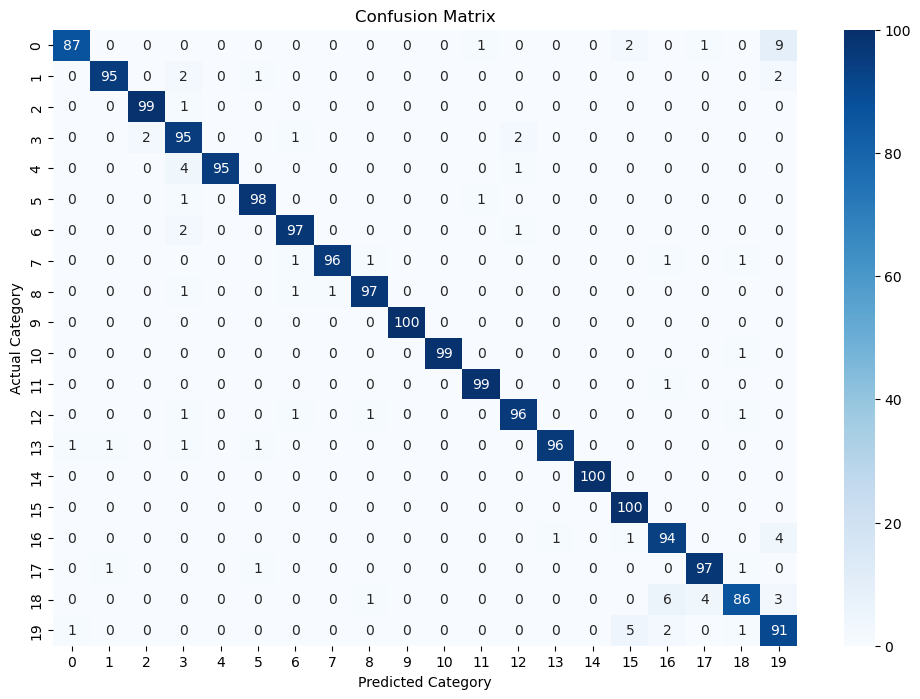

In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Overall accuracy
accuracy = accuracy_score(df['Labels'], df['Predicted_Category'])
print("Accuracy:", round(accuracy, 4))

# Precision, Recall, F1-score (macro-averaged)
precision = precision_score(df['Labels'], df['Predicted_Category'], average='macro')
recall = recall_score(df['Labels'], df['Predicted_Category'], average='macro')
f1 = f1_score(df['Labels'], df['Predicted_Category'], average='macro')

print("Precision (macro):", round(precision, 4))
print("Recall (macro):", round(recall, 4))
print("F1 Score (macro):", round(f1, 4))

# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(df['Labels'], df['Predicted_Category']))

# Confusion matrix
cm = confusion_matrix(df['Labels'], df['Predicted_Category'])
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Category")
plt.ylabel("Actual Category")
plt.show()


In [89]:
# Sentiment distribution overall
print(df['Sentiment'].value_counts(normalize=True) * 100)

# Sentiment distribution by category
sentiment_summary = df.groupby('Labels')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)
print("\nSentiment by Category:\n", sentiment_summary)



Sentiment
Positive    66.70
Negative    31.55
Neutral      1.75
Name: proportion, dtype: float64

Sentiment by Category:
 Sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                   0.42     0.01      0.57
comp.graphics                 0.13     0.04      0.83
comp.os.ms-windows.misc       0.24     0.02      0.74
comp.sys.ibm.pc.hardware      0.21     0.00      0.79
comp.sys.mac.hardware         0.24     0.03      0.73
comp.windows.x                0.20     0.02      0.78
misc.forsale                  0.07     0.08      0.85
rec.autos                     0.27     0.01      0.72
rec.motorcycles               0.30     0.02      0.68
rec.sport.baseball            0.27     0.01      0.72
rec.sport.hockey              0.28     0.01      0.71
sci.crypt                     0.29     0.00      0.71
sci.electronics               0.18     0.04      0.78
sci.med                       0.38     0.01      0.61
sci.space     

Submission Guidelines
•	Your submission should include a comprehensive report and the complete codebase.
1. Comprehensive Report

Your report should include the following sections:

a) Introduction

Briefly describe the dataset: blogs_categories.csv

Objective of the assignment: classify blog posts and analyze sentiment

b) Data Exploration & Preprocessing (Task 1)

Number of posts, categories

Sample of raw and cleaned text

Preprocessing steps:

Lowercasing

Removing punctuation and stopwords

Tokenization

TF-IDF feature extraction
c) Naive Bayes Classification (Task 2)

Train/test split

Model training and prediction

Key observations about predicted categories
d) Sentiment Analysis (Task 3)

Method used: NLTK VADER

Sentiment categories: Positive, Negative, Neutral

Overall sentiment distribution

Category-wise sentiment breakdown

Visualizations (count plots, stacked bar charts)
e) Evaluation (Task 4)

Accuracy, precision, recall, F1-score

Confusion matrix

Discussion on:

Model strengths

Challenges (misclassifications, overlapping categories)

Reflection on sentiment analysis insights
f) Conclusions & Recommendations (Task 5)

Summary of model performance and sentiment trends

Suggestions for improvement:

Use n-grams or embeddings

Experiment with other classifiers

Handle class imbalance

Improve preprocessing (lemmatization, rare words, URLs)
. Codebase

Include a single Python notebook (.ipynb) or script (.py) containing:

Data loading and exploration

Preprocessing steps

Naive Bayes model training and predictions

Sentiment analysis

Evaluation metrics and visualizations

Conclusions / summary outputs


. Codebase

Include a single Python notebook (.ipynb) or script (.py) containing:

Data loading and exploration

Preprocessing steps

Naive Bayes model training and predictions

Sentiment analysis

Evaluation metrics and visualizations

Conclusions / summary outputs

Evaluation Criteria

1. Data Preprocessing & Feature Extraction

✅ Load dataset correctly (blogs_categories.csv)

✅ Clean text: lowercase, remove punctuation, remove stopwords

✅ Tokenization or other necessary preprocessing steps

✅ Feature extraction using TF-IDF

✅ Comments explaining each preprocessing step in the code

Tip: Include a short before-and-after example of a blog post to show cleaning.

2. Naive Bayes Classification

✅ Correct train-test split

✅ Naive Bayes model implemented and trained

✅ Predictions stored and evaluated

✅ Accuracy, precision, recall, F1-score calculated

✅ Confusion matrix visualized

✅ Observations/discussion about performance, strengths, and weaknesses

Tip: Mention any misclassified categories and possible reasons.

3. Sentiment Analysis

✅ Applied sentiment analysis (VADER recommended)

✅ Labeled blog posts as Positive, Negative, Neutral

✅ Overall sentiment distribution

✅ Category-wise sentiment breakdown

✅ Visualization (count plots, stacked bar charts)

✅ Insightful discussion connecting sentiment to content

Tip: Highlight any interesting patterns, e.g., certain categories having mostly neutral or positive sentiment.

4. Evaluation & Discussion

✅ Quantitative metrics explained (accuracy, precision, recall, F1-score)

✅ Confusion matrix interpreted

✅ Strengths and challenges of Naive Bayes model discussed

✅ Reflection on sentiment analysis results

✅ Recommendations for improvement

5. Report & Code Quality

✅ Clear structure: Introduction, Preprocessing, Model, Sentiment, Evaluation, Conclusion

✅ Well-commented code explaining each major step

✅ Visualizations with proper titles, labels, and legends

✅ Exported final CSV with Data, Labels, Predicted_Category, Sentiment (optional but recommended)

✅ Organized and neat notebook or script